In [2]:
#e.pyPython
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [29]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
# df = pd.read_csv("",index_col=0, parse_dates=True)

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [30]:
pd.options.display.max_columns = None

In [31]:
pd.options.display.max_rows = None

In [34]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1',length=203))

In [45]:
index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

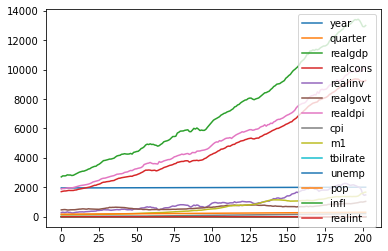

In [49]:
df.plot()

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
# from statsmodels.tsa.filter.hp_filter import hpfilter

# !pip install statsmodels 
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-15-99a88ec2bf97> in <module>
----> 1 from statsmodels.tsa.filter.hp_filter import hpfilter

ModuleNotFoundError: No module named 'statsmodels.tsa.filter'

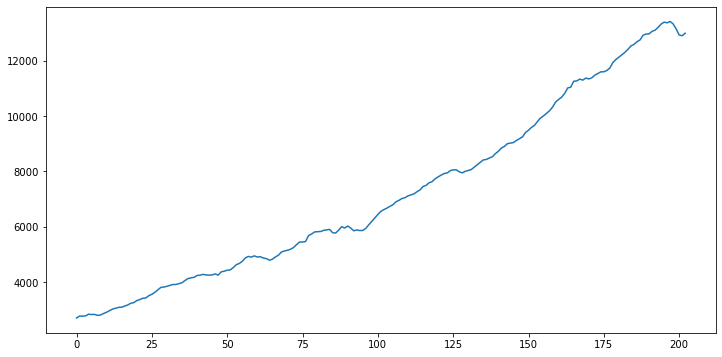

In [7]:
df['realgdp'].plot(figsize=(12,6))

# ---------------------------------------------------------------------------------------------------------------

In [35]:
dta = sm.datasets.macrodata.load_pandas().data

In [ ]:
# https://pydoc.net/statsmodels/0.6.1/statsmodels.tsa.filters.hp_filter/

In [50]:
dta = sm.datasets.macrodata.load_pandas().data

In [52]:
dates = sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')

In [53]:
index = pd.DatetimeIndex(dates)

In [54]:
dta.set_index(index, inplace=True)

In [55]:
cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)

In [56]:
gdp_decomp = dta[['realgdp']]

In [57]:
gdp_decomp["cycle"] = cycle

<ipython-input-57-3ecdfe607023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle


In [58]:
gdp_decomp["trend"] = trend

<ipython-input-58-72a00bac0ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


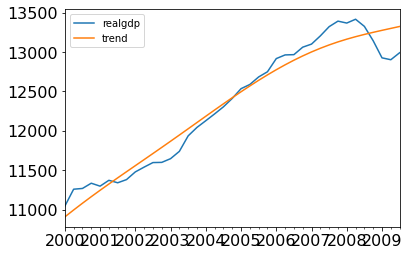

In [59]:
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax,fontsize=16);
plt.show()

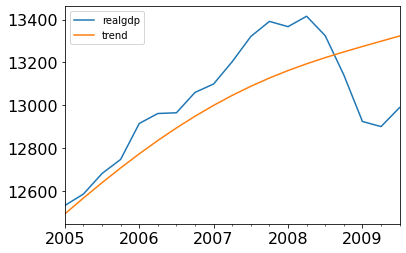

In [63]:
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]]["2005-01-01":].plot(ax=ax,fontsize=16);
plt.show()

In [61]:
type(trend)

pandas.core.series.Series

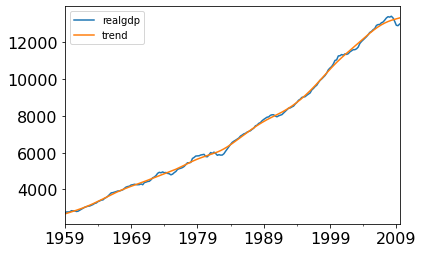

In [62]:
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]].plot(ax=ax,fontsize=16);
plt.show()

# ---------------------------------------------------------------------------------------------------- 